In [2]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
covid <- read_csv("owid-covid-data.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  iso_code = col_character(),
  continent = col_character(),
  location = col_character(),
  date = col_date(format = ""),
  icu_patients = col_logical(),
  icu_patients_per_million = col_logical(),
  hosp_patients = col_logical(),
  hosp_patients_per_million = col_logical(),
  weekly_icu_admissions = col_logical(),
  weekly_icu_admissions_per_million = col_logical(),
  weekly_hosp_admissions = col_logical(),
  weekly_hosp_admissions_per_million = col_logical(),
  total_tests = col_logical(),
  new_tests = col_logical(),
  total_tests_per_thousand = col_logical(),
  new_tests_per_thousand = col_logical(),
  new_tests_smoothed = col_logical(),
  new_tests_smoothed_per_thousand = col_logical(),
  tests_per_case = col_logical(),
  positive_rate = col_logical()
  # ... with 4 more columns
)
See spec(...) for full column specifications.
Warning message:
"341404 parsing failures.
 row             col           expected actual

In [4]:
table(covid$location)


                     Afghanistan                          Albania 
                             322                              253 
                         Algeria                          Andorra 
                             322                              254 
                          Angola                         Anguilla 
                             240                              235 
             Antigua and Barbuda                        Argentina 
                             242                              257 
                         Armenia                            Aruba 
                             322                              244 
                       Australia                          Austria 
                             322                              322 
                      Azerbaijan                          Bahamas 
                             322                              244 
                         Bahrain                       Bangla

In [5]:
dim(covid[covid$location == "United States",])

[1] 322  50

In [6]:
head(covid[covid$iso_code == "USA",1:20])

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients
USA,North America,United States,2019-12-31,NA,0,NA,NA,0,NA,NA,0,NA,NA,0,NA,NA,NA,NA,NA
USA,North America,United States,2020-01-01,NA,0,NA,NA,0,NA,NA,0,NA,NA,0,NA,NA,NA,NA,NA
USA,North America,United States,2020-01-02,NA,0,NA,NA,0,NA,NA,0,NA,NA,0,NA,NA,NA,NA,NA
USA,North America,United States,2020-01-03,NA,0,NA,NA,0,NA,NA,0,NA,NA,0,NA,NA,NA,NA,NA
USA,North America,United States,2020-01-04,NA,0,NA,NA,0,NA,NA,0,NA,NA,0,NA,NA,NA,NA,NA
USA,North America,United States,2020-01-05,NA,0,NA,NA,0,NA,NA,0,NA,NA,0,NA,NA,NA,NA,NA


In [12]:
USA_cases <- covid[!is.na(covid$iso_code), ] %>% filter(iso_code == "USA") %>% select("total_cases", "date") %>% na.omit()
head(USA_cases)

total_cases,date
1,2020-01-21
1,2020-01-22
1,2020-01-23
1,2020-01-24
2,2020-01-25
2,2020-01-26


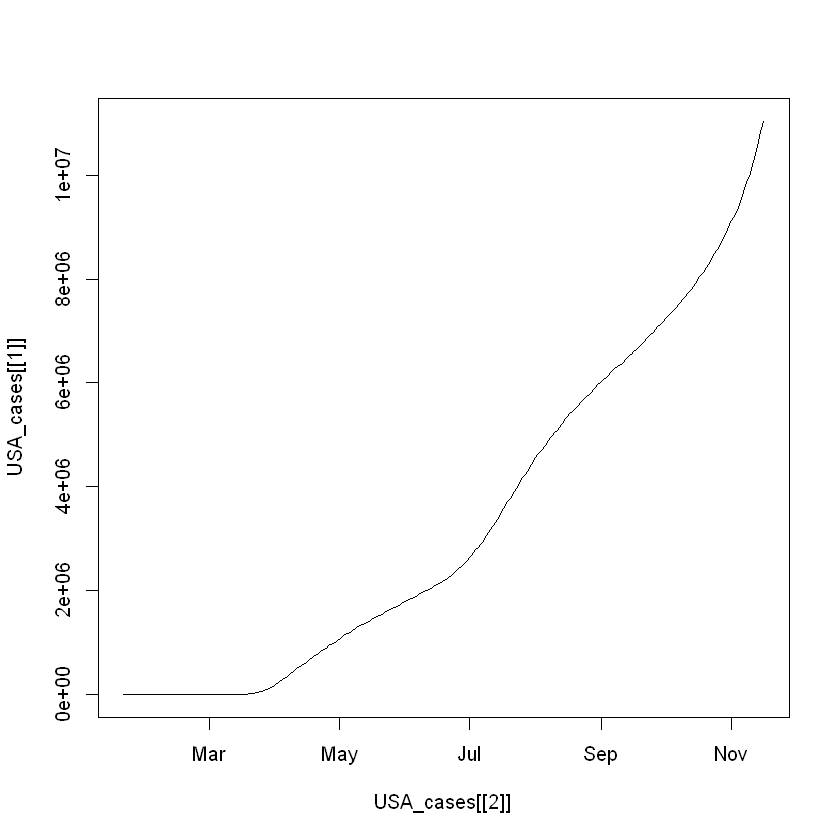

In [8]:
plot(USA_cases[[2]], USA_cases[[1]], type="l")

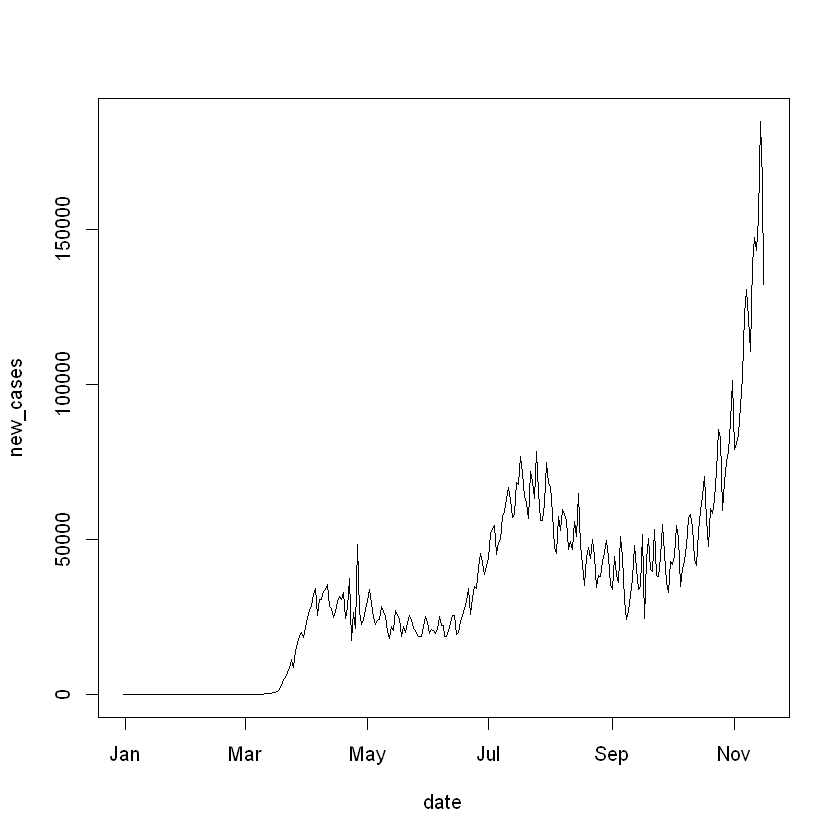

In [9]:
covid[!is.na(covid$iso_code), ] %>% filter(iso_code == "USA") %>% select(date,new_cases) %>% na.omit() %>%
    plot(type="l")

In [10]:
USA <- covid[!is.na(covid$iso_code), ] %>% filter(iso_code == "USA")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 61 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 61 rows containing missing values (geom_path)."

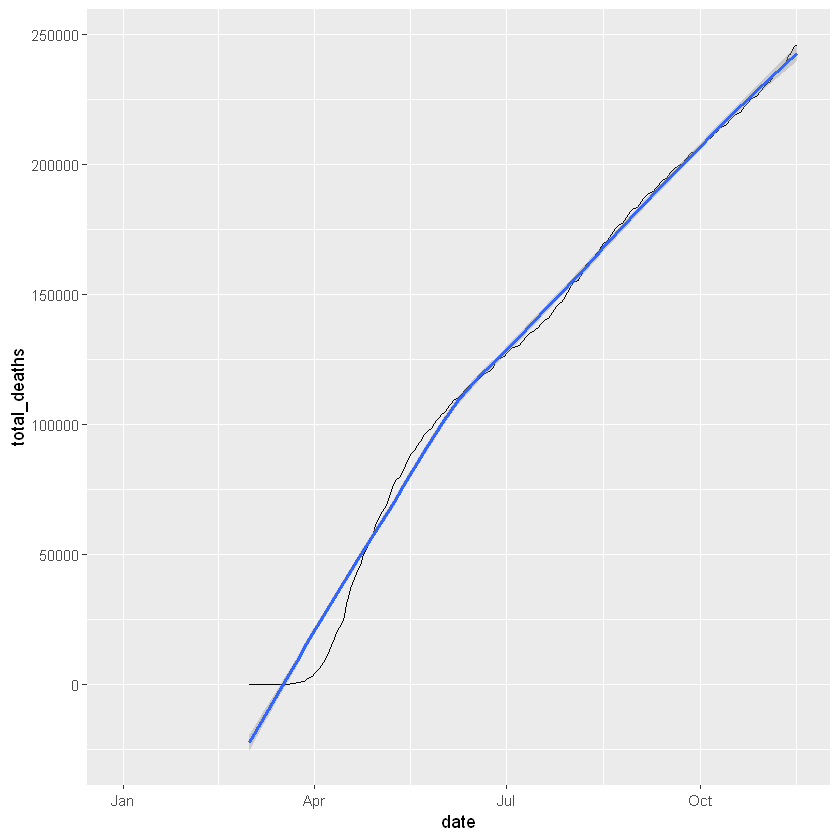

In [ ]:
USA[, 1:12] %>% ggplot(aes(x = date, y = total_deaths)) + geom_line() +geom_smooth()# +xlim(1, 20)